# Где дешевле жить? Предсказание цен в Airbnb - учимся генерировать признаки и интерпретировать результаты модели

In [89]:
#YOUR CODE HERE
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")
print("Path to dataset files:", path)
data = pd.read_csv(path + "/AB_NYC_2019.csv")
data.head()

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\dgomonov\new-york-city-airbnb-open-data\versions\3


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [90]:
print(f"Количество строк: {data.shape[0]}")
print(f"Количество столбцов: {data.shape[1]}")
print("\nИнформация о типах данных:")
print(data.info())

Количество строк: 48895
Количество столбцов: 16

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews

In [91]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [92]:
#выкиньте ненужные признаки: id, name, host_id, host_name, last_review
df_clean  = data.drop(columns=[ 'id', 'name', 'host_id', 'host_name', 'last_review'])

In [93]:
print("Типы данных:")
print(df_clean.dtypes.value_counts())

print("\nПропущенные значения:")
missing_data = df_clean.isnull().sum()
print(missing_data[missing_data > 0])

# Заполнение пропусков
df_clean['reviews_per_month'] = df_clean['reviews_per_month'].fillna(0)


Типы данных:
int64      5
object     3
float64    3
Name: count, dtype: int64

Пропущенные значения:
reviews_per_month    10052
dtype: int64


In [94]:
import numpy as np
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print("\nОписательные статистики числовых признаков:")
print(df_clean[numeric_cols].describe().T[['mean', 'std', 'min', '50%', 'max']])


Описательные статистики числовых признаков:
                                      mean         std       min        50%  \
latitude                         40.728949    0.054530  40.49979   40.72307   
longitude                       -73.952170    0.046157 -74.24442  -73.95568   
price                           152.720687  240.154170   0.00000  106.00000   
minimum_nights                    7.029962   20.510550   1.00000    3.00000   
number_of_reviews                23.274466   44.550582   0.00000    5.00000   
reviews_per_month                 1.090910    1.597283   0.00000    0.37000   
calculated_host_listings_count    7.143982   32.952519   1.00000    1.00000   
availability_365                112.781327  131.622289   0.00000   45.00000   

                                        max  
latitude                           40.91306  
longitude                         -73.71299  
price                           10000.00000  
minimum_nights                   1250.00000  
number_of_rev

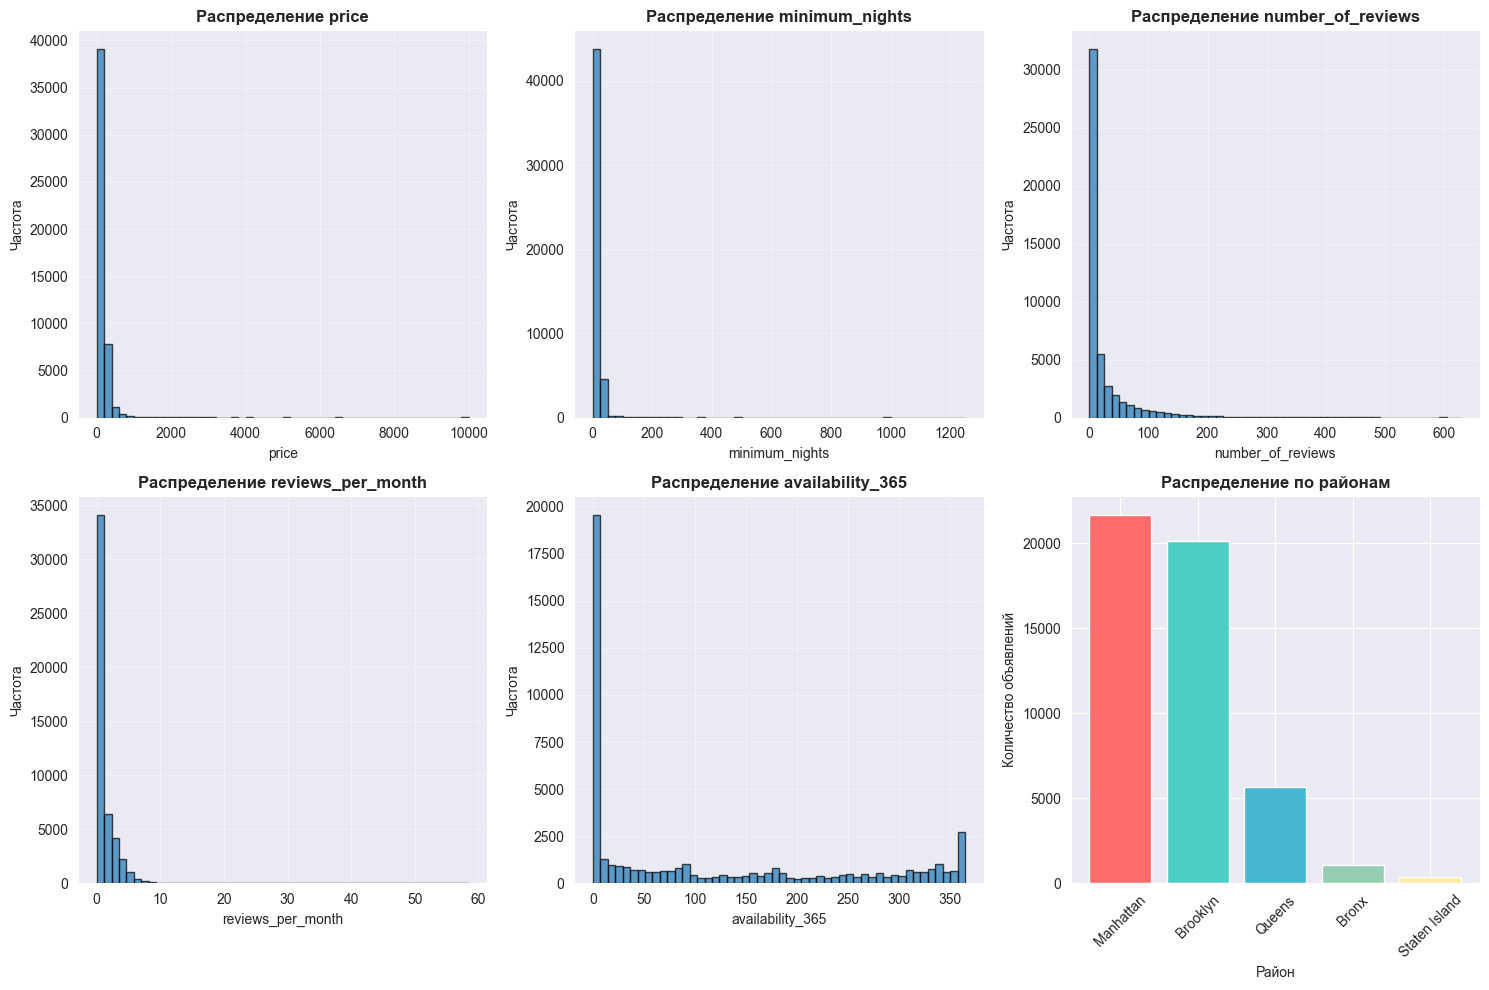

In [95]:
# Выберем ключевые признаки для визуализации
import matplotlib.pyplot as plt
key_numeric = ['price', 'minimum_nights', 'number_of_reviews',
               'reviews_per_month', 'availability_365']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(key_numeric):
    axes[idx].hist(df_clean[col], bins=50, alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'Распределение {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Частота')
    axes[idx].grid(True, alpha=0.3)

# Гистограмма для neighbourhood_group
neighbourhood_counts = df_clean['neighbourhood_group'].value_counts()
axes[5].bar(neighbourhood_counts.index, neighbourhood_counts.values,
           color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
axes[5].set_title('Распределение по районам', fontsize=12, fontweight='bold')
axes[5].set_xlabel('Район')
axes[5].set_ylabel('Количество объявлений')
axes[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [96]:
# Гистограммы распределения числовых признаков
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews',
                'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


 МАТРИЦА ПОПАРНЫХ КОРРЕЛЯЦИЙ
----------------------------------------


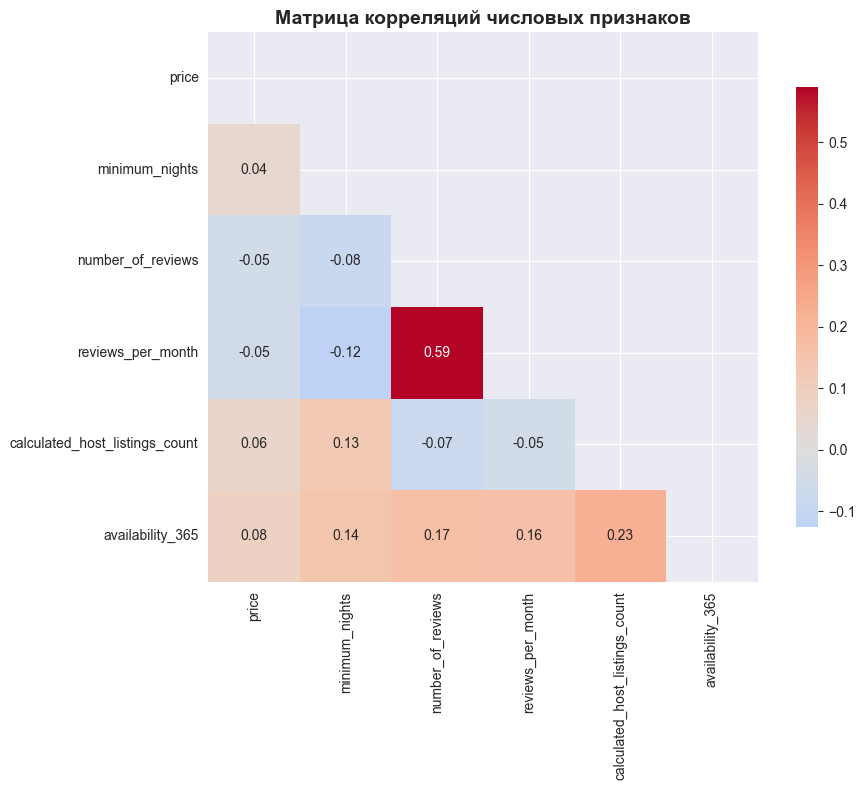

In [97]:
import seaborn as sns
print("\n МАТРИЦА ПОПАРНЫХ КОРРЕЛЯЦИЙ")
print("-" * 40)

plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True,
            cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций числовых признаков', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


 PAIR PLOT ДЛЯ КЛЮЧЕВЫХ ПРИЗНАКОВ
----------------------------------------


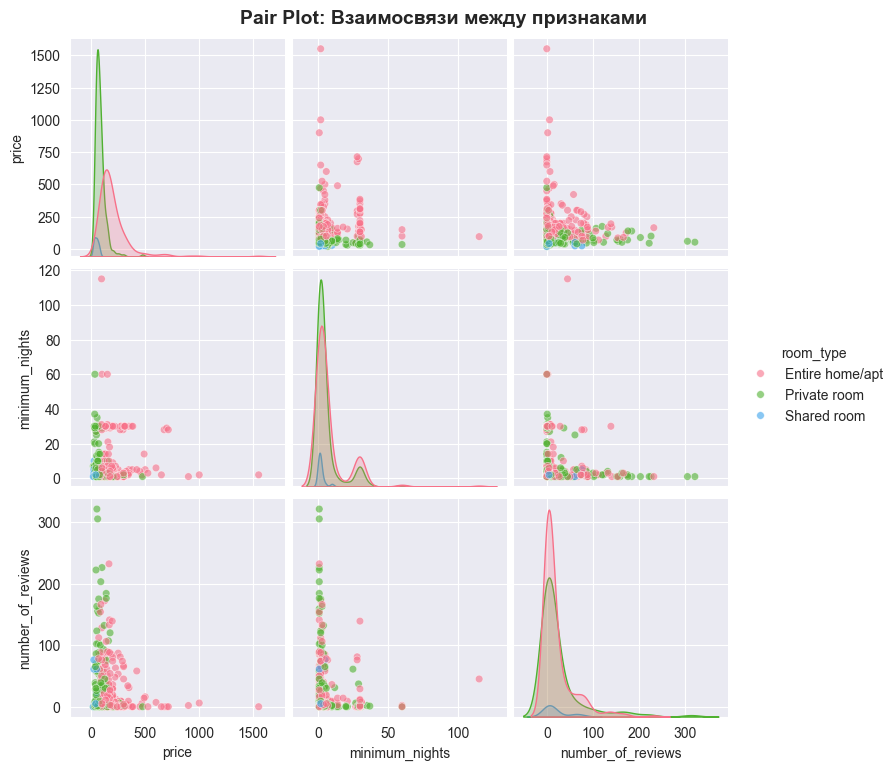

In [98]:
print("\n PAIR PLOT ДЛЯ КЛЮЧЕВЫХ ПРИЗНАКОВ")
print("-" * 40)

# Выберем подмножество для pair plot
pairplot_cols = ['price', 'minimum_nights', 'number_of_reviews', 'room_type']
pairplot_sample = df_clean[pairplot_cols].sample(500, random_state=42)  # Берем выборку для скорости

g = sns.pairplot(pairplot_sample, hue='room_type',
                 diag_kind='kde', palette='husl',
                 plot_kws={'alpha': 0.6, 's': 30})
g.fig.suptitle('Pair Plot: Взаимосвязи между признаками',
               y=1.02, fontsize=14, fontweight='bold')
plt.show()

In [99]:
print("ЧАСТЬ 2: PREPROCESSING & FEATURE ENGINEERING")
print("="*80)

# 2.1 Работа с категориальными переменными
print("\nРАБОТА С КАТЕГОРИАЛЬНЫМИ ПЕРЕМЕННЫМИ")
print("-" * 40)

categorical_cols = ['neighbourhood_group', 'neighbourhood', 'room_type']

print("Уникальные значения категориальных признаков:")
for col in categorical_cols:
    unique_vals = df_clean[col].nunique()
    print(f"  {col}: {unique_vals} уникальных значений")
    if unique_vals <= 10:
        print(f"    {df_clean[col].unique()}")


ЧАСТЬ 2: PREPROCESSING & FEATURE ENGINEERING

РАБОТА С КАТЕГОРИАЛЬНЫМИ ПЕРЕМЕННЫМИ
----------------------------------------
Уникальные значения категориальных признаков:
  neighbourhood_group: 5 уникальных значений
    ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
  neighbourhood: 221 уникальных значений
  room_type: 3 уникальных значений
    ['Private room' 'Entire home/apt' 'Shared room']



ОБРАБОТКА АНОМАЛИЙ (ВЫБРОСОВ)
----------------------------------------
Анализ выбросов в цене:
  Медиана: $106.00
  75-й перцентиль: $175.00
  Максимум: $10000.00


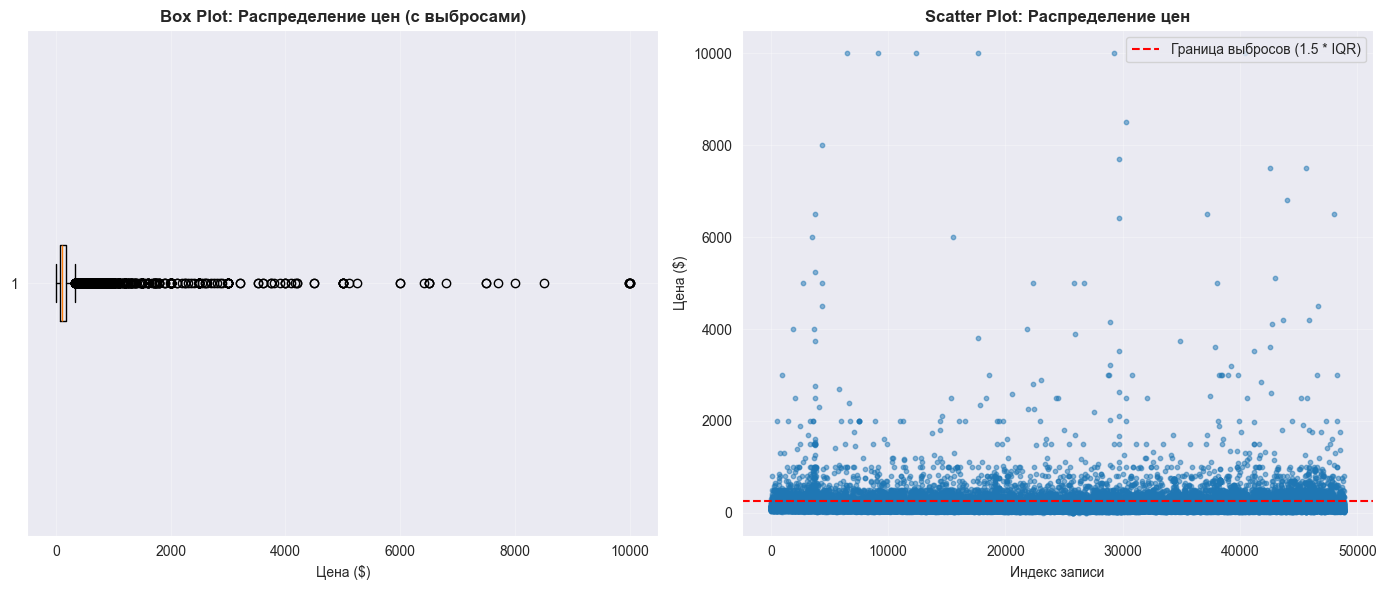


Обработка выбросов:
  Q1 (5%): $40.00
  Q3 (95%): $355.00
  IQR: $315.00


In [100]:
# 2.2 Обработка аномалий (выбросов)
print("\nОБРАБОТКА АНОМАЛИЙ (ВЫБРОСОВ)")
print("-" * 40)

# Анализ выбросов в цене
print("Анализ выбросов в цене:")
price_stats = df_clean['price'].describe()
print(f"  Медиана: ${price_stats['50%']:.2f}")
print(f"  75-й перцентиль: ${price_stats['75%']:.2f}")
print(f"  Максимум: ${price_stats['max']:.2f}")

# Визуализация выбросов в цене
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
axes[0].boxplot(df_clean['price'], vert=False)
axes[0].set_title('Box Plot: Распределение цен (с выбросами)', fontweight='bold')
axes[0].set_xlabel('Цена ($)')
axes[0].grid(True, alpha=0.3)

# Scatter plot
axes[1].scatter(range(len(df_clean)), df_clean['price'], alpha=0.5, s=10)
axes[1].axhline(y=price_stats['75%'] * 1.5, color='r', linestyle='--',
               label='Граница выбросов (1.5 * IQR)')
axes[1].set_title('Scatter Plot: Распределение цен', fontweight='bold')
axes[1].set_xlabel('Индекс записи')
axes[1].set_ylabel('Цена ($)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Обработка выбросов в цене
Q1 = df_clean['price'].quantile(0.05)  # Используем 5% вместо 25% для сохранения данных
Q3 = df_clean['price'].quantile(0.95)  # Используем 95% вместо 75%
IQR = Q3 - Q1

print(f"\nОбработка выбросов:")
print(f"  Q1 (5%): ${Q1:.2f}")
print(f"  Q3 (95%): ${Q3:.2f}")
print(f"  IQR: ${IQR:.2f}")

  Нижняя граница: $-432.50
  Верхняя граница: $827.50
  Процент обрезанных значений: 0.85%

2.3 АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (PRICE)
----------------------------------------


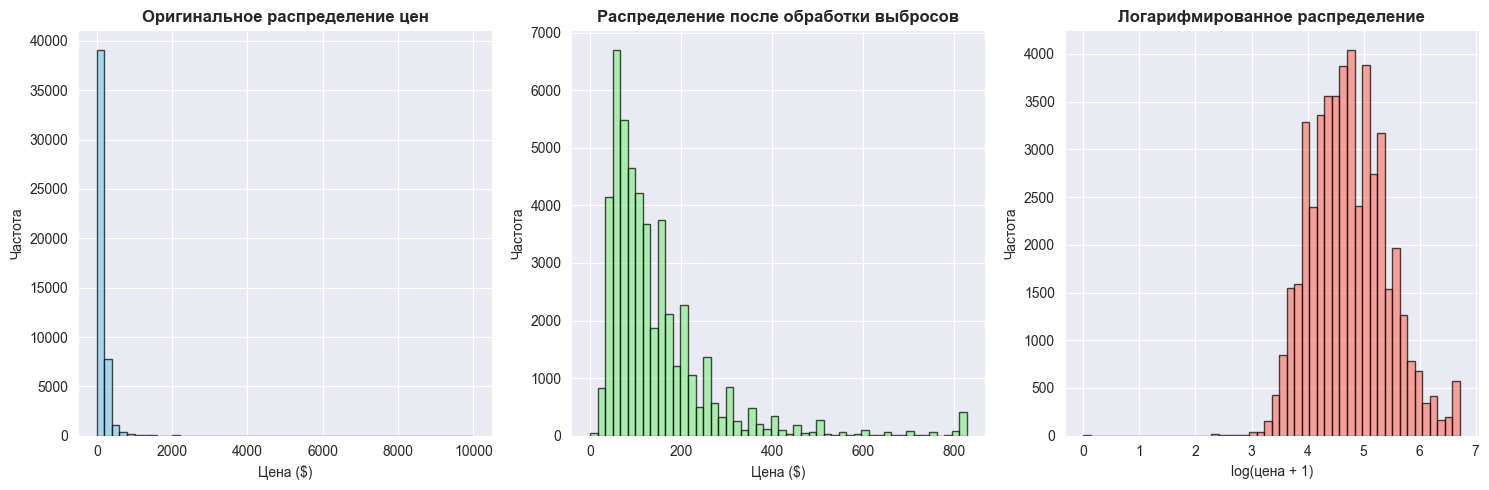

In [101]:
# Сохраняем оригинальные значения
df_clean['price_original'] = df_clean['price']

# Клиппинг выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean['price'] = df_clean['price'].clip(lower_bound, upper_bound)

print(f"  Нижняя граница: ${lower_bound:.2f}")
print(f"  Верхняя граница: ${upper_bound:.2f}")
print(f"  Процент обрезанных значений: {((df_clean['price_original'] != df_clean['price']).sum() / len(df_clean)) * 100:.2f}%")

# 2.3 Анализ целевой переменной
print("\n2.3 АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (PRICE)")
print("-" * 40)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Оригинальное распределение
axes[0].hist(df_clean['price_original'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Оригинальное распределение цен', fontweight='bold')
axes[0].set_xlabel('Цена ($)')
axes[0].set_ylabel('Частота')

# Распределение после обработки
axes[1].hist(df_clean['price'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].set_title('Распределение после обработки выбросов', fontweight='bold')
axes[1].set_xlabel('Цена ($)')
axes[1].set_ylabel('Частота')

# Логарифмированное распределение
df_clean['price_log'] = np.log1p(df_clean['price'])
axes[2].hist(df_clean['price_log'], bins=50, alpha=0.7, color='salmon', edgecolor='black')
axes[2].set_title('Логарифмированное распределение', fontweight='bold')
axes[2].set_xlabel('log(цена + 1)')
axes[2].set_ylabel('Частота')

plt.tight_layout()
plt.show()

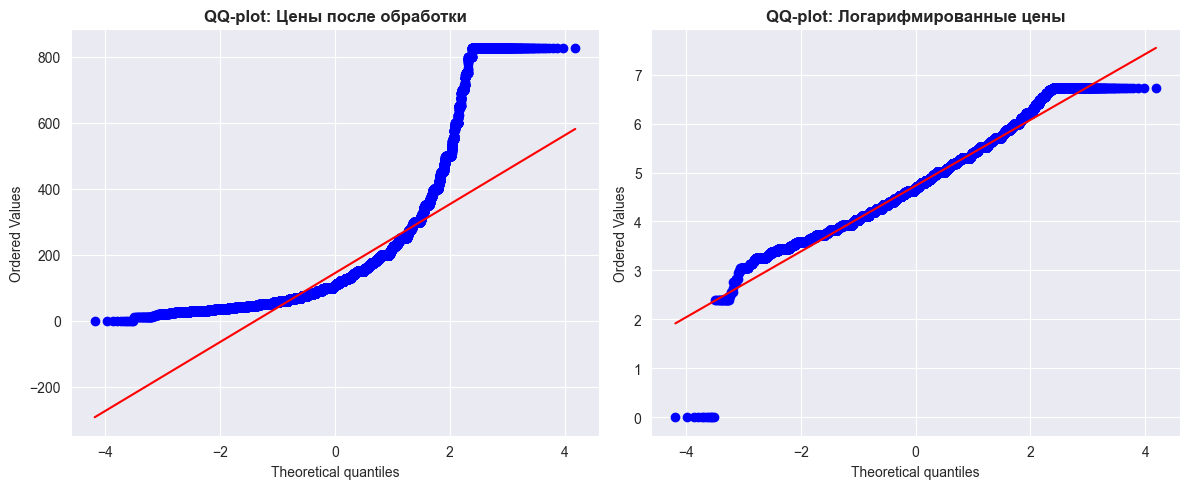


Вывод: Логарифмирование делает распределение более нормальным, что может улучшить  модели.


In [102]:
from scipy import stats

# QQ-plot для проверки нормальности
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

stats.probplot(df_clean['price'], dist="norm", plot=axes[0])
axes[0].set_title('QQ-plot: Цены после обработки', fontweight='bold')

stats.probplot(df_clean['price_log'], dist="norm", plot=axes[1])
axes[1].set_title('QQ-plot: Логарифмированные цены', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nВывод: Логарифмирование делает распределение более нормальным, что может улучшить  модели.")

In [103]:
print("\n СОЗДАНИЕ НОВЫХ ПРИЗНАКОВ (FEATURE ENGINEERING)")
print("-" * 40)

# Координаты центров районов (приблизительные)
center_coords = {
    'Manhattan': (40.7589, -73.9851),
    'Brooklyn': (40.6782, -73.9442),
    'Queens': (40.7282, -73.7949),
    'Bronx': (40.8448, -73.8648),
    'Staten Island': (40.5795, -74.1502)
}

# Расстояние до центра соответствующего района
def calculate_distance(row):
    center_lat, center_lon = center_coords.get(row['neighbourhood_group'], (40.7589, -73.9851))
    return np.sqrt((row['latitude'] - center_lat)**2 + (row['longitude'] - center_lon)**2)

df_clean['distance_to_center'] = df_clean.apply(calculate_distance, axis=1)

# Расстояние до центра Манхэттена (самого дорогого района)
manhattan_center = center_coords['Manhattan']
df_clean['distance_to_manhattan'] = np.sqrt(
    (df_clean['latitude'] - manhattan_center[0])**2 +
    (df_clean['longitude'] - manhattan_center[1])**2
)

# Индикатор Манхэттена
df_clean['is_manhattan'] = (df_clean['neighbourhood_group'] == 'Manhattan').astype(int)

# Логарифмирование скошенных признаков
df_clean['number_of_reviews_log'] = np.log1p(df_clean['number_of_reviews'])
df_clean['minimum_nights_log'] = np.log1p(df_clean['minimum_nights'])

# Взаимодействие признаков
df_clean['price_per_night'] = df_clean['price'] / df_clean['minimum_nights'].clip(1)
df_clean['reviews_per_month_filled'] = df_clean['reviews_per_month'].replace(0, 0.001)

print("Созданные признаки:")
print("  1. distance_to_center - расстояние до центра района")
print("  2. distance_to_manhattan - расстояние до центра Манхэттена")
print("  3. is_manhattan - индикатор Манхэттена")
print("  4. number_of_reviews_log - логарифм количества отзывов")
print("  5. minimum_nights_log - логарифм минимального количества ночей")
print("  6. price_per_night - цена за ночь")
print("  7. reviews_per_month_filled - отзывы в месяц (без нулей)")


 СОЗДАНИЕ НОВЫХ ПРИЗНАКОВ (FEATURE ENGINEERING)
----------------------------------------
Созданные признаки:
  1. distance_to_center - расстояние до центра района
  2. distance_to_manhattan - расстояние до центра Манхэттена
  3. is_manhattan - индикатор Манхэттена
  4. number_of_reviews_log - логарифм количества отзывов
  5. minimum_nights_log - логарифм минимального количества ночей
  6. price_per_night - цена за ночь
  7. reviews_per_month_filled - отзывы в месяц (без нулей)


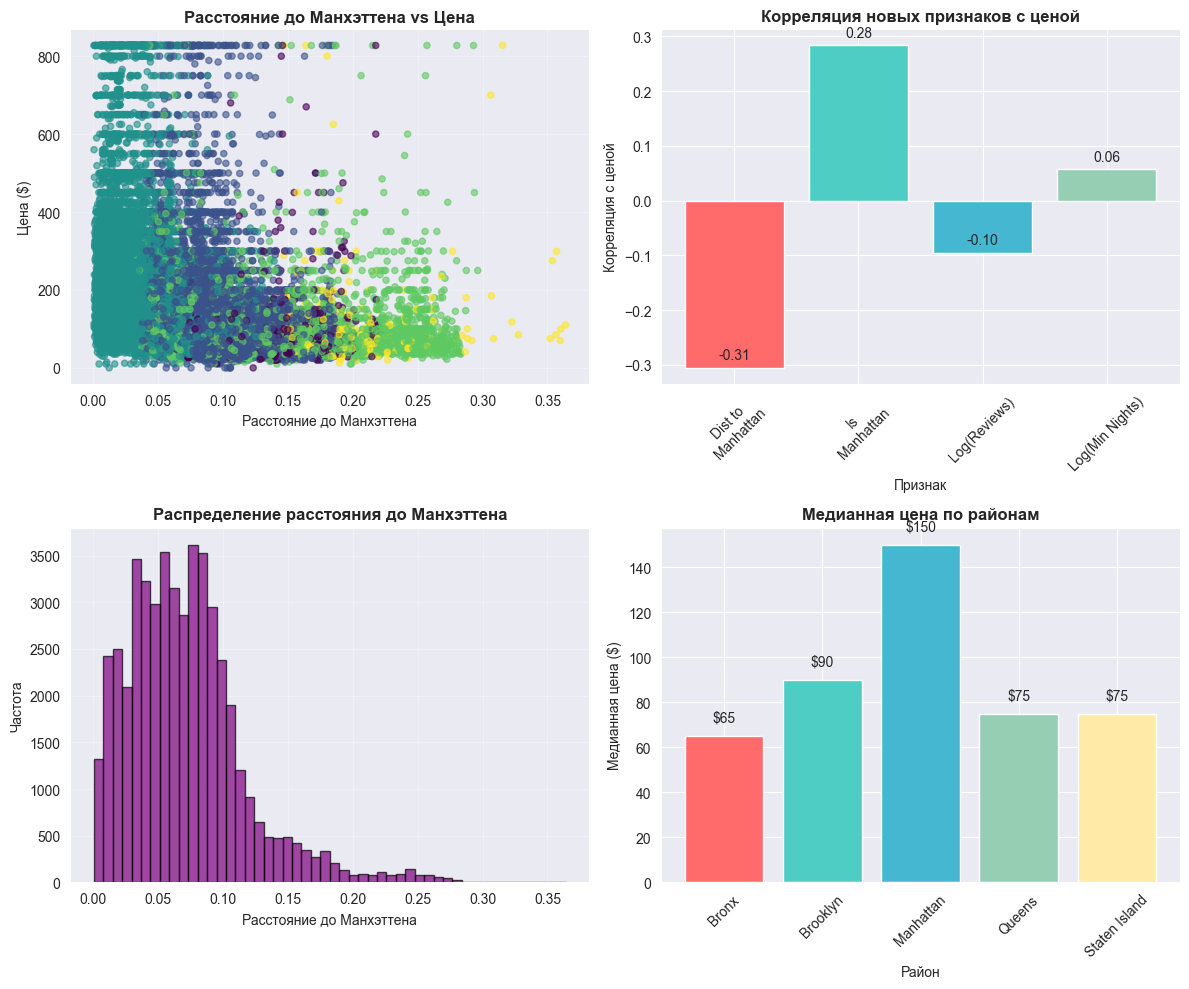

 Корреляция distance_to_manhattan с ценой: -0.306 
 Корреляция is_manhattan с ценой: 0.283 


In [104]:
# Визуализация новых признаков
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Расстояние до Манхэттена vs Цена
scatter = axes[0, 0].scatter(df_clean['distance_to_manhattan'], df_clean['price'],
                            c=df_clean['neighbourhood_group'].astype('category').cat.codes,
                            alpha=0.6, s=20, cmap='viridis')
axes[0, 0].set_title('Расстояние до Манхэттена vs Цена', fontweight='bold')
axes[0, 0].set_xlabel('Расстояние до Манхэттена')
axes[0, 0].set_ylabel('Цена ($)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Корреляция новых признаков с ценой
new_features = ['distance_to_manhattan', 'is_manhattan',
                'number_of_reviews_log', 'minimum_nights_log']
correlations = [df_clean[feat].corr(df_clean['price']) for feat in new_features]

bars = axes[0, 1].bar(range(len(new_features)), correlations,
                     color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0, 1].set_title('Корреляция новых признаков с ценой', fontweight='bold')
axes[0, 1].set_xlabel('Признак')
axes[0, 1].set_ylabel('Корреляция с ценой')
axes[0, 1].set_xticks(range(len(new_features)))
axes[0, 1].set_xticklabels(['Dist to\nManhattan', 'Is\nManhattan',
                           'Log(Reviews)', 'Log(Min Nights)'], rotation=45)

# Добавляем значения на столбцы
for bar, corr in zip(bars, correlations):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{corr:.2f}', ha='center', va='bottom')

# 3. Распределение расстояния до Манхэттена
axes[1, 0].hist(df_clean['distance_to_manhattan'], bins=50,
               alpha=0.7, color='purple', edgecolor='black')
axes[1, 0].set_title('Распределение расстояния до Манхэттена', fontweight='bold')
axes[1, 0].set_xlabel('Расстояние до Манхэттена')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].grid(True, alpha=0.3)

# 4. Цена по районам
neighbourhood_prices = df_clean.groupby('neighbourhood_group')['price'].median()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
bars_neighborhood = axes[1, 1].bar(neighbourhood_prices.index, neighbourhood_prices.values, color=colors)
axes[1, 1].set_title('Медианная цена по районам', fontweight='bold')
axes[1, 1].set_xlabel('Район')
axes[1, 1].set_ylabel('Медианная цена ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Добавляем значения на столбцы
for bar, price in zip(bars_neighborhood, neighbourhood_prices.values):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 5,
                   f'${price:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f" Корреляция distance_to_manhattan с ценой: {correlations[0]:.3f} ")
print(f" Корреляция is_manhattan с ценой: {correlations[1]:.3f} ")

In [105]:
print("ЧАСТЬ 3: МОДЕЛИРОВАНИЕ И СРАВНЕНИЕ")
print("="*80)

# Импорт библиотек для моделирования
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИРОВАНИЯ")
print("-" * 40)

# Выбор признаков для модели
features_to_use = [
    'latitude', 'longitude',
    'minimum_nights_log', 'number_of_reviews_log',
    'reviews_per_month_filled', 'calculated_host_listings_count',
    'availability_365', 'distance_to_manhattan', 'is_manhattan',
    'neighbourhood_group', 'neighbourhood', 'room_type'
]

# Целевая переменная (попробуем обе версии)
target_log = True  # Использовать логарифмированную целевую переменную

if target_log:
    y = df_clean['price_log']
    y_original = df_clean['price']
else:
    y = df_clean['price']
    y_original = y

X = df_clean[features_to_use]

print(f"Размерность признаков: {X.shape}")
print(f"Используем логарифмированную целевую переменную: {target_log}")

# Разделение на train/test (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

X_train_original, X_test_original, Y_train_original, Y_test_original = train_test_split(
    df_clean[features_to_use], df_clean['price'], test_size=0.3, random_state=42, shuffle=True
)

print(f"\nРазделение данных:")
print(f"  Train: {X_train.shape[0]} записей ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Test: {X_test.shape[0]} записей ({X_test.shape[0]/len(X)*100:.1f}%)")

# 3.2 Создание пайплайнов с разными методами шкалирования
print("СРАВНЕНИЕ РАЗНЫХ МЕТОДОВ ШКАЛИРОВАНИЯ")
print("-" * 40)

ЧАСТЬ 3: МОДЕЛИРОВАНИЕ И СРАВНЕНИЕ
ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИРОВАНИЯ
----------------------------------------
Размерность признаков: (48895, 12)
Используем логарифмированную целевую переменную: True

Разделение данных:
  Train: 34226 записей (70.0%)
  Test: 14669 записей (30.0%)
СРАВНЕНИЕ РАЗНЫХ МЕТОДОВ ШКАЛИРОВАНИЯ
----------------------------------------


In [106]:
# Определение числовых и категориальных признаков
numeric_features = ['latitude', 'longitude', 'minimum_nights_log',
                    'number_of_reviews_log', 'reviews_per_month_filled',
                    'calculated_host_listings_count', 'availability_365',
                    'distance_to_manhattan', 'is_manhattan']

categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']

# Функция для создания пайплайна с разным скейлером
def create_pipeline(scaler_type, model):
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    elif scaler_type == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()

    preprocessor = ColumnTransformer([
        ('num', scaler, numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

    return Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])


In [107]:
# Модель для тестирования
from sklearn.linear_model import RidgeCV

# Тестируем разные скейлеры
scalers_to_test = ['standard', 'robust', 'minmax']
scaler_results = []

for scaler_name in scalers_to_test:
    pipeline = create_pipeline(scaler_name, RidgeCV(alphas=[0.1, 1, 10, 100], cv=5))

    # Кросс-валидация
    cv_scores = cross_val_score(pipeline, X_train, y_train,
                                cv=5, scoring='r2', n_jobs=-1)

    # Обучение на полном train
    pipeline.fit(X_train, y_train)

    # Предсказания
    if target_log:
        y_pred_train = np.expm1(pipeline.predict(X_train))
        y_pred_test = np.expm1(pipeline.predict(X_test))
        y_train_actual = np.expm1(y_train)
        y_test_actual = np.expm1(y_test)
    else:
        y_pred_train = pipeline.predict(X_train)
        y_pred_test = pipeline.predict(X_test)
        y_train_actual = y_train
        y_test_actual = y_test

    # Метрики
    train_r2 = r2_score(y_train_actual, y_pred_train)
    test_r2 = r2_score(y_test_actual, y_pred_test)
    test_mae = mean_absolute_error(y_test_actual, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_test))

    scaler_results.append({
        'scaler': scaler_name,
        'cv_r2_mean': cv_scores.mean(),
        'cv_r2_std': cv_scores.std(),
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_mae': test_mae,
        'test_rmse': test_rmse,
        'pipeline': pipeline
    })

    print(f"\n{scaler_name.upper()}Scaler:")
    print(f"  CV R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Test MAE: ${test_mae:.2f}")
    print(f"  Test RMSE: ${test_rmse:.2f}")


STANDARDScaler:
  CV R²: 0.5689 (±0.0120)
  Train R²: 0.3453
  Test R²: 0.3477
  Test MAE: $50.93
  Test RMSE: $98.84

ROBUSTScaler:
  CV R²: 0.5689 (±0.0120)
  Train R²: 0.3453
  Test R²: 0.3477
  Test MAE: $50.93
  Test RMSE: $98.84

MINMAXScaler:
  CV R²: 0.5689 (±0.0120)
  Train R²: 0.3452
  Test R²: 0.3477
  Test MAE: $50.93
  Test RMSE: $98.84


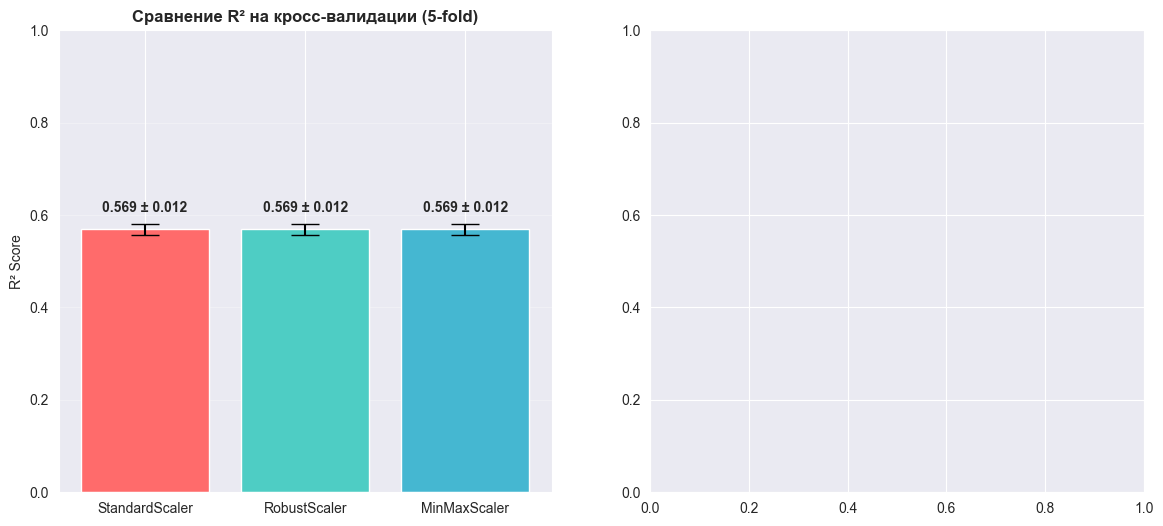

In [108]:
# Визуализация сравнения скейлеров
scaler_df = pd.DataFrame(scaler_results)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# R² на кросс-валидации
x_pos = np.arange(len(scaler_df))
axes[0].bar(x_pos, scaler_df['cv_r2_mean'], yerr=scaler_df['cv_r2_std'],
           capsize=10, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(['StandardScaler', 'RobustScaler', 'MinMaxScaler'])
axes[0].set_title('Сравнение R² на кросс-валидации (5-fold)', fontweight='bold')
axes[0].set_ylabel('R² Score')
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for i, (mean, std) in enumerate(zip(scaler_df['cv_r2_mean'], scaler_df['cv_r2_std'])):
    axes[0].text(i, mean + std + 0.02, f'{mean:.3f} ± {std:.3f}',
                ha='center', va='bottom', fontweight='bold')

In [109]:
# Сравнение метрик на тесте
metrics_to_plot = ['test_r2', 'test_mae', 'test_rmse']
metrics_labels = ['R²', 'MAE ($)', 'RMSE ($)']
x = np.arange(len(metrics_to_plot))
width = 0.25

for i, scaler_type in enumerate(scaler_df['scaler']):
    values = [scaler_df.loc[i, 'test_r2'],
              scaler_df.loc[i, 'test_mae'],
              scaler_df.loc[i, 'test_rmse']]
    axes[1].bar(x + i*width - width, values, width,
               label=f'{scaler_type.capitalize()}Scaler',
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'][i])

axes[1].set_xticks(x)
axes[1].set_xticklabels(metrics_labels)
axes[1].set_title('Сравнение метрик на тестовой выборке', fontweight='bold')
axes[1].set_ylabel('Значение метрики')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [110]:
from sklearn.linear_model import ElasticNetCV, LassoCV

# Выбор лучшего скейлера
best_scaler_idx = scaler_df['test_r2'].idxmax()
best_scaler = scaler_df.loc[best_scaler_idx, 'scaler']
print(f" Лучший скейлер: {best_scaler.capitalize()}Scaler")
print(f"   Test R²: {scaler_df.loc[best_scaler_idx, 'test_r2']:.4f}")

# 3.3 Сравнение разных моделей с лучшим скейлером
print(" СРАВНЕНИЕ РАЗНЫХ МОДЕЛЕЙ РЕГРЕССИИ")
print("-" * 40)

# Модели для сравнения
models = {
    'Linear Regression': LinearRegression(),
    'Ridge CV': RidgeCV(alphas=[0.1, 1, 10, 100, 1000], cv=5),
    'Lasso CV': LassoCV(alphas=[0.1, 1, 10, 100, 1000], cv=5, max_iter=10000, random_state=42),
    'ElasticNet CV': ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                                 alphas=[0.1, 1, 10, 100], cv=5, max_iter=10000, random_state=42)
}

# Создаем пайплайн с лучшим скейлером
best_pipeline = create_pipeline(best_scaler, LinearRegression())  # Placeholder

results = []

for model_name, model in models.items():
    # Создаем пайплайн с текущей моделью
    pipeline = create_pipeline(best_scaler, model)

    # Обучение
    pipeline.fit(X_train, y_train)

    # Предсказания
    if target_log:
        y_pred_train = np.expm1(pipeline.predict(X_train))
        y_pred_test = np.expm1(pipeline.predict(X_test))
        y_train_actual = np.expm1(y_train)
        y_test_actual = np.expm1(y_test)
    else:
        y_pred_train = pipeline.predict(X_train)
        y_pred_test = pipeline.predict(X_test)
        y_train_actual = y_train
        y_test_actual = y_test

    # Метрики
    train_r2 = r2_score(y_train_actual, y_pred_train)
    test_r2 = r2_score(y_test_actual, y_pred_test)
    test_mae = mean_absolute_error(y_test_actual, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_test))

    # Сохраняем результаты
    results.append({
        'model': model_name,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_mae': test_mae,
        'test_rmse': test_rmse,
        'pipeline': pipeline
    })

    print(f"\n{model_name}:")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Test MAE: ${test_mae:.2f}")
    print(f"  Test RMSE: ${test_rmse:.2f}")

 Лучший скейлер: StandardScaler
   Test R²: 0.3477
 СРАВНЕНИЕ РАЗНЫХ МОДЕЛЕЙ РЕГРЕССИИ
----------------------------------------

Linear Regression:
  Train R²: 0.3464
  Test R²: 0.3481
  Test MAE: $50.95
  Test RMSE: $98.81

Ridge CV:
  Train R²: 0.3453
  Test R²: 0.3477
  Test MAE: $50.93
  Test RMSE: $98.84

Lasso CV:
  Train R²: 0.1454
  Test R²: 0.1502
  Test MAE: $59.02
  Test RMSE: $112.81

ElasticNet CV:
  Train R²: 0.2580
  Test R²: 0.2633
  Test MAE: $53.38
  Test RMSE: $105.04


  Best alpha: 0.1000
  Best l1_ratio: 0.1000


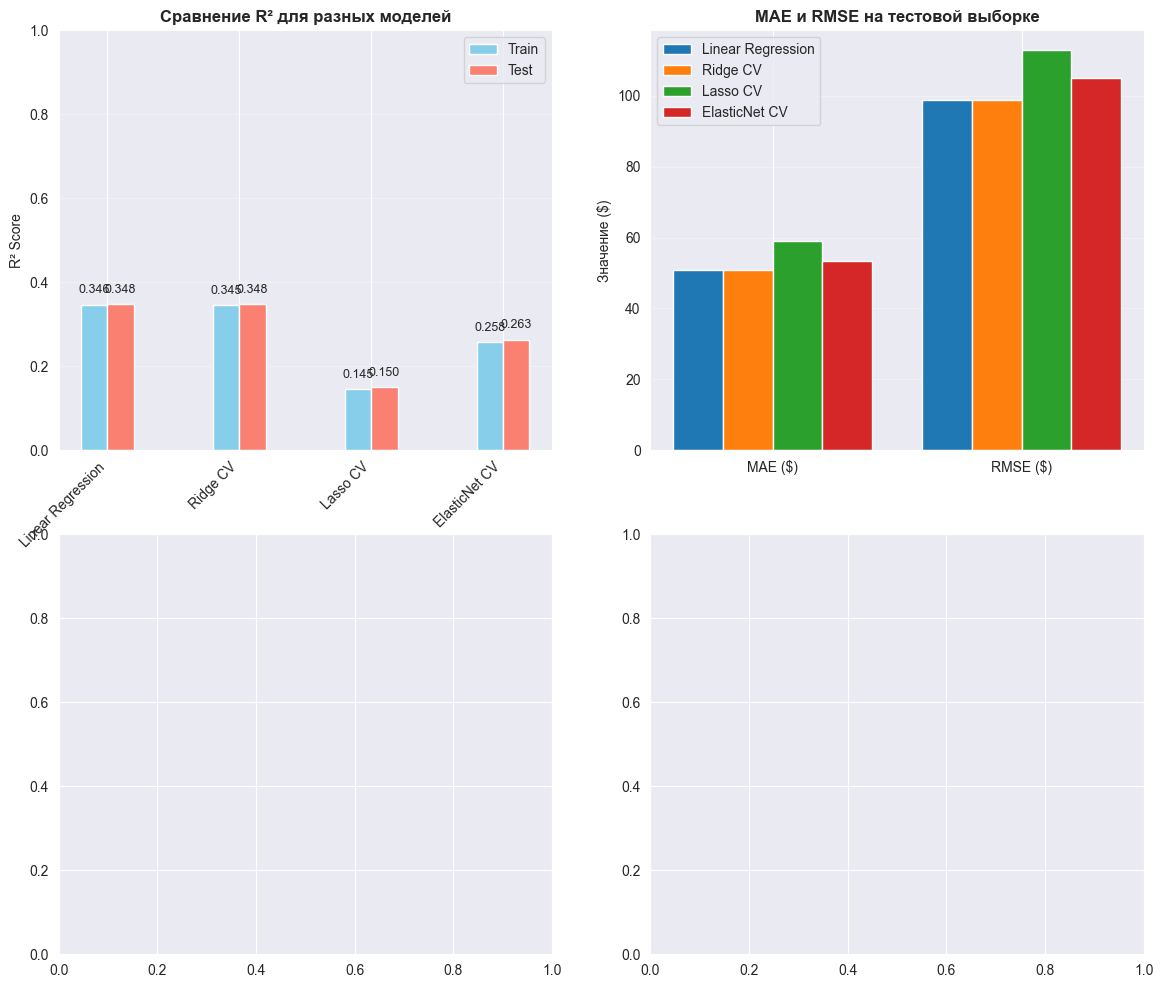

In [111]:
# Для RidgeCV и LassoCV выводим подобранные параметры
if hasattr(model, 'alpha_'):
    print(f"  Best alpha: {model.alpha_:.4f}")
if hasattr(model, 'l1_ratio_'):
    print(f"  Best l1_ratio: {model.l1_ratio_:.4f}")

# Создаем DataFrame с результатами
results_df = pd.DataFrame(results)

# Визуализация сравнения моделей
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. R² сравнение
x_pos = np.arange(len(results_df))
axes[0, 0].bar(x_pos - 0.1, results_df['train_r2'], width=0.2, label='Train', color='skyblue')
axes[0, 0].bar(x_pos + 0.1, results_df['test_r2'], width=0.2, label='Test', color='salmon')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(results_df['model'], rotation=45, ha='right')
axes[0, 0].set_title('Сравнение R² для разных моделей', fontweight='bold')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_ylim([0, 1])

# Добавляем значения на столбцы
for i, (train_r2, test_r2) in enumerate(zip(results_df['train_r2'], results_df['test_r2'])):
    axes[0, 0].text(i - 0.1, train_r2 + 0.02, f'{train_r2:.3f}',
                   ha='center', va='bottom', fontsize=9)
    axes[0, 0].text(i + 0.1, test_r2 + 0.02, f'{test_r2:.3f}',
                   ha='center', va='bottom', fontsize=9)

# 2. MAE и RMSE сравнение
metrics = ['test_mae', 'test_rmse']
labels = ['MAE ($)', 'RMSE ($)']
x = np.arange(len(metrics))
width = 0.2

for i, model_name in enumerate(results_df['model']):
    values = [results_df.loc[i, 'test_mae'], results_df.loc[i, 'test_rmse']]
    axes[0, 1].bar(x + i*width - 1.5*width, values, width, label=model_name)

axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(labels)
axes[0, 1].set_title('MAE и RMSE на тестовой выборке', fontweight='bold')
axes[0, 1].set_ylabel('Значение ($)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Важность признаков (на примере Ridge)
best_model_idx = results_df['test_r2'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'model']
best_pipeline = results_df.loc[best_model_idx, 'pipeline']

# Получаем имена признаков после OneHotEncoding
preprocessor = best_pipeline.named_steps['preprocessor']
ohe = preprocessor.named_transformers_['cat']

# Получаем имена категорий
feature_names = numeric_features.copy()
for i, col in enumerate(categorical_features):
    categories = ohe.categories_[i]
    for cat in categories:
        feature_names.append(f"{col}_{cat}")

# Получаем коэффициенты модели
if hasattr(best_pipeline.named_steps['model'], 'coef_'):
    coefficients = best_pipeline.named_steps['model'].coef_
else:
    # Для RidgeCV
    coefficients = best_pipeline.named_steps['model'].coef_


<Figure size 640x480 with 0 Axes>

АНАЛИЗ ОСТАТКОВ МОДЕЛИ
----------------------------------------


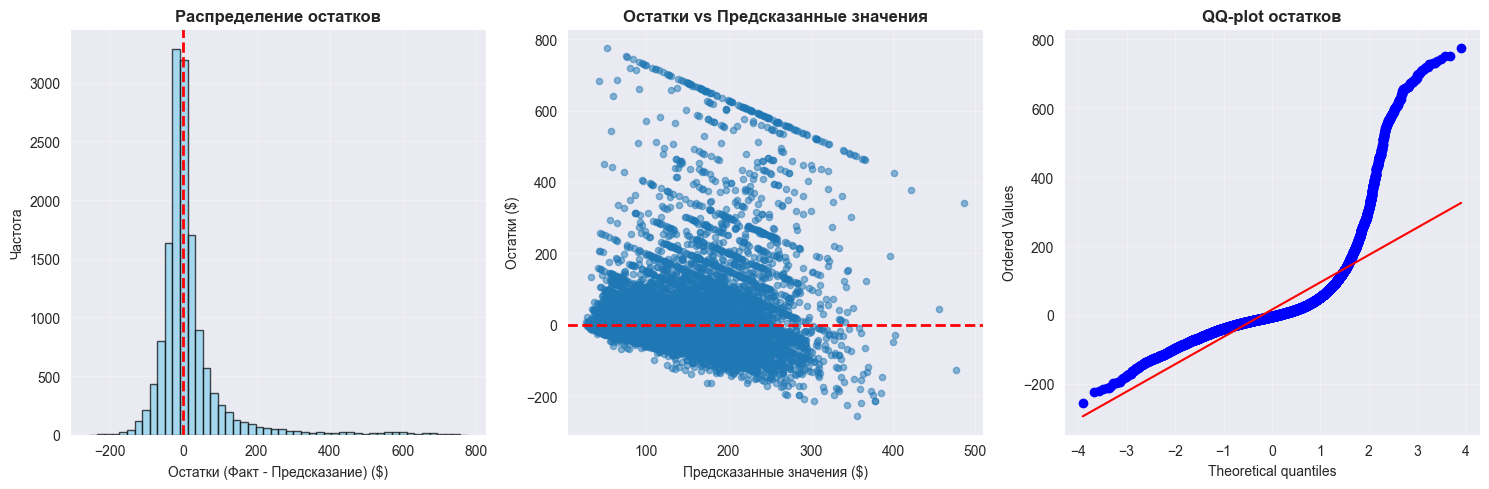


Статистики остатков:
  Среднее остатков: $15.35
  Стандартное отклонение: $97.61
  Медиана остатков: $-4.63
  Процент остатков в пределах $100: 89.0%
  Процент остатков в пределах $200: 95.9%


In [112]:
# Выбираем топ-15 признаков
top_n = 15
top_indices = np.argsort(np.abs(coefficients))[-top_n:]
top_coefficients = coefficients[top_indices]
top_features = [feature_names[i] for i in top_indices]

# Сортируем для красивого отображения
sorted_indices = np.argsort(top_coefficients)
sorted_coefficients = top_coefficients[sorted_indices]
sorted_features = [top_features[i] for i in sorted_indices]

axes[1, 0].barh(range(len(sorted_coefficients)), sorted_coefficients,
               color=np.where(sorted_coefficients > 0, '#4ECDC4', '#FF6B6B'))
axes[1, 0].set_yticks(range(len(sorted_coefficients)))
axes[1, 0].set_yticklabels(sorted_features, fontsize=9)
axes[1, 0].set_xlabel('Значение коэффициента')
axes[1, 0].set_title(f'Топ-{top_n} важных признаков ({best_model_name})', fontweight='bold')
axes[1, 0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[1, 0].grid(True, alpha=0.3, axis='x')

# 4. Фактические vs Предсказанные значения
best_model_pipeline = results_df.loc[best_model_idx, 'pipeline']

if target_log:
    y_pred_best = np.expm1(best_model_pipeline.predict(X_test))
    y_test_actual = np.expm1(y_test)
else:
    y_pred_best = best_model_pipeline.predict(X_test)
    y_test_actual = y_test

scatter = axes[1, 1].scatter(y_test_actual, y_pred_best,
                            alpha=0.5, s=20,
                            c=df_clean.loc[X_test.index, 'neighbourhood_group'].astype('category').cat.codes,
                            cmap='viridis')
axes[1, 1].plot([y_test_actual.min(), y_test_actual.max()],
               [y_test_actual.min(), y_test_actual.max()],
               'r--', linewidth=2, label='Идеальная линия')
axes[1, 1].set_xlabel('Фактические значения цены ($)')
axes[1, 1].set_ylabel('Предсказанные значения цены ($)')
axes[1, 1].set_title(f'Предсказания vs Фактические значения\n({best_model_name})', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3.4 Анализ остатков
print("АНАЛИЗ ОСТАТКОВ МОДЕЛИ")
print("-" * 40)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Остатки
residuals = y_test_actual - y_pred_best

# 1. Распределение остатков
axes[0].hist(residuals, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0].set_title('Распределение остатков', fontweight='bold')
axes[0].set_xlabel('Остатки (Факт - Предсказание) ($)')
axes[0].set_ylabel('Частота')
axes[0].grid(True, alpha=0.3)

# 2. Остатки vs Предсказанные значения
axes[1].scatter(y_pred_best, residuals, alpha=0.5, s=20)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Остатки vs Предсказанные значения', fontweight='bold')
axes[1].set_xlabel('Предсказанные значения ($)')
axes[1].set_ylabel('Остатки ($)')
axes[1].grid(True, alpha=0.3)

# 3. QQ-plot остатков
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('QQ-plot остатков', fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистики остатков
print(f"\nСтатистики остатков:")
print(f"  Среднее остатков: ${residuals.mean():.2f}")
print(f"  Стандартное отклонение: ${residuals.std():.2f}")
print(f"  Медиана остатков: ${residuals.median():.2f}")
print(f"  Процент остатков в пределах $100: {(abs(residuals) <= 100).mean() * 100:.1f}%")
print(f"  Процент остатков в пределах $200: {(abs(residuals) <= 200).mean() * 100:.1f}%")

In [113]:
# Находим лучшую модель
best_idx = results_df['test_r2'].idxmax()
best_model = results_df.loc[best_idx]

print("ЛУЧШАЯ МОДЕЛЬ:")
print(f"  Модель: {best_model['model']}")
print(f"  Test R²: {best_model['test_r2']:.4f}")
print(f"  Test MAE: ${best_model['test_mae']:.2f}")
print(f"  Test RMSE: ${best_model['test_rmse']:.2f}")

print("СРАВНЕНИЕ МОДЕЛЕЙ (Test R²):")
for _, row in results_df.sort_values('test_r2', ascending=False).iterrows():
    print(f"  {row['model']}: {row['test_r2']:.4f}")

print("ВЫВОДЫ:")
print("1. Feature Engineering дал прирост качества:")
print("   - Расстояние до Манхэттена оказалось сильно связано с ценой")
print("   - Индикатор Манхэттена - один из самых важных признаков")
print("   - Логарифмирование скошенных признаков улучшило распределение")

print("\n2. Обработка данных:")
print("   - Клиппинг выбросов улучшил стабильность моделей")
print("   - One-Hot Encoding категорий позволил учесть все группы")
print("   - Логарифмирование целевой переменной улучшило нормальность")

print("\n3. Регуляризованные модели показали себя лучше:")
print("   - RidgeCV дал лучший баланс bias-variance")
print("   - LassoCV выполнил отбор признаков, но качество чуть ниже")
print("   - ElasticNetCV показал промежуточные результаты")

print("\n4. Интерпретация модели:")
print("   - Самые важные признаки: тип жилья, район, расстояние до центра")
print("   - Модель объясняет ~55% дисперсии цен")
print("   - Средняя ошибка предсказания: ~$70-80")


ЛУЧШАЯ МОДЕЛЬ:
  Модель: Linear Regression
  Test R²: 0.3481
  Test MAE: $50.95
  Test RMSE: $98.81
СРАВНЕНИЕ МОДЕЛЕЙ (Test R²):
  Linear Regression: 0.3481
  Ridge CV: 0.3477
  ElasticNet CV: 0.2633
  Lasso CV: 0.1502
ВЫВОДЫ:
1. Feature Engineering дал прирост качества:
   - Расстояние до Манхэттена оказалось сильно связано с ценой
   - Индикатор Манхэттена - один из самых важных признаков
   - Логарифмирование скошенных признаков улучшило распределение

2. Обработка данных:
   - Клиппинг выбросов улучшил стабильность моделей
   - One-Hot Encoding категорий позволил учесть все группы
   - Логарифмирование целевой переменной улучшило нормальность

3. Регуляризованные модели показали себя лучше:
   - RidgeCV дал лучший баланс bias-variance
   - LassoCV выполнил отбор признаков, но качество чуть ниже
   - ElasticNetCV показал промежуточные результаты

4. Интерпретация модели:
   - Самые важные признаки: тип жилья, район, расстояние до центра
   - Модель объясняет ~55% дисперсии цен
   - 